Horacio Flores

# Reference

## https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

---
#**Introduction To Machine Learning**
##**Supervised Learning (= classification):**

*   k-Nearest Neighbor (kNN)
*   **naive Bayesian (NB)**
*   Decision Tree (DT)
*   Support Vector Machine (SVM)
---

Bayes theorem provides a way of calculating the posterior probability, P(c|x), from P(c), P(x), and P(x|c). Naive Bayes classifier assumes that the effect of the value of a predictor (x) on a given class *c* is independent of the values of other predictors. This assumption is called class conditional independence.
![Naive Bayes Equation](https://miro.medium.com/max/954/1*2SnqzKlKD9DC5qL8C4HaQQ.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>
<b>Breast Cancer Wisconsin (Diagnostic) Data Set:</b> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. This data set is originally from the University of Wisconsin CS department at ftp ftp.cs.wisc.edu > cd math-prog/cpo-dataset/machine-learn/WDBC/. But I found it in the University of California Urvine Machine Learning Depository at the link below. The first column is a unique Id, the second column is a binary variable ‘M’ for malignant and ‘B’ for benign. Then there are 30 independent variables which are all different measurements of cell nucleus size and shape.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [149]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>Import the Dataset

In [150]:
df = pd.read_csv("breast-cancer.csv")
df = df.iloc[:, 1:32]
df.tail(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Information and Visualization </font>

#### <font color = blue> View all Rows and Cols

In [151]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### <font color = blue> Data Information

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### <font color = blue> Visualize Target Class Label Distributiuon

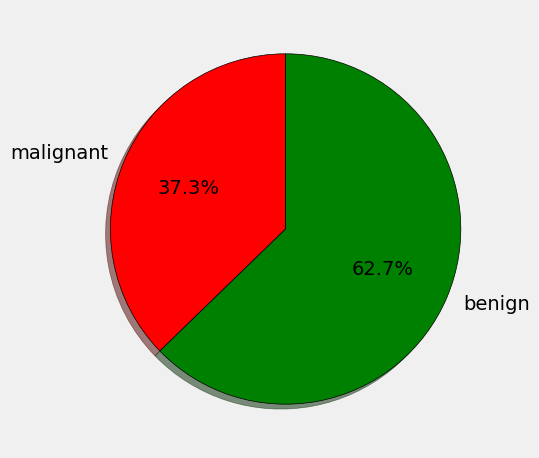

In [153]:
plt.style.use('fivethirtyeight')
malignant = df[df['diagnosis'] == 'M'].shape[0]
benign = df[df['diagnosis'] == 'B'].shape[0]

class_ = [malignant, benign]
label = ['malignant', 'benign']

plt.pie(class_, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['red', 'green'])

plt.tight_layout()
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and Target Attributes </font>

In [154]:
X = df.iloc[:, 1:32]
Y = df.iloc[:, 0]

#### <font color = blue> Predictor Attributes

In [155]:
X.tail(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


#### <font color = blue> Target Attribute

In [156]:
Y.tail(3)

566    M
567    M
568    B
Name: diagnosis, dtype: object

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Split the Data into Training and Testing </font>

In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, 
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)

#### <font color = blue> Training Data

In [158]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

X_train (455, 30)
Y_train (455,)


#### <font color = blue> Testing Data

In [159]:
print("X_test", X_test.shape)
print("X_test", Y_test.shape)

X_test (114, 30)
X_test (114,)


### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Check Missing Value </font>

In [160]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Feature Selection - With Correlation </font>

#### <font color = blue> Correlation

In [161]:
corr = X_train.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.316083,0.998185,0.987094,0.164226,0.508985,0.669625,0.823662,0.130193,-0.330992,0.687831,-0.133134,0.684132,0.736629,-0.233293,0.174817,0.134351,0.337090,-0.131112,-0.050336,0.969537,0.281647,0.966220,0.941185,0.116935,0.403744,0.511501,0.736397,0.149669,-0.004484
texture_mean,0.316083,1.000000,0.322445,0.318626,-0.023107,0.241977,0.298975,0.292473,0.064376,-0.071964,0.274250,0.391945,0.279962,0.258296,0.005236,0.187780,0.115727,0.138461,-0.011331,0.045517,0.349677,0.908182,0.354636,0.348051,0.093454,0.273151,0.298302,0.289088,0.098803,0.115940
perimeter_mean,0.998185,0.322445,1.000000,0.986692,0.197597,0.555299,0.705993,0.850247,0.161548,-0.286012,0.699386,-0.122660,0.700160,0.745369,-0.212220,0.216026,0.164918,0.367159,-0.113737,-0.016077,0.969520,0.288406,0.970507,0.941920,0.145972,0.442236,0.545424,0.762361,0.171204,0.035518
area_mean,0.987094,0.318626,0.986692,1.000000,0.170459,0.500276,0.679675,0.823160,0.131129,-0.302548,0.741652,-0.095706,0.739008,0.802692,-0.173831,0.182002,0.152064,0.334977,-0.097331,-0.029255,0.961717,0.276386,0.959382,0.958527,0.120212,0.380076,0.498019,0.712975,0.126243,-0.008425
smoothness_mean,0.164226,-0.023107,0.197597,0.170459,1.000000,0.643792,0.503715,0.540170,0.536098,0.569111,0.291174,0.078002,0.281436,0.237709,0.361200,0.296529,0.219063,0.371415,0.190091,0.277729,0.202340,0.039730,0.222953,0.196480,0.800811,0.454826,0.418035,0.491856,0.374436,0.487641
compactness_mean,0.508985,0.241977,0.555299,0.500276,0.643792,1.000000,0.879782,0.832933,0.583548,0.540311,0.490794,0.037658,0.523968,0.448349,0.164984,0.726166,0.534107,0.641033,0.188297,0.506778,0.537510,0.257121,0.583536,0.511644,0.577326,0.865480,0.818573,0.825494,0.501795,0.685937
concavity_mean,0.669625,0.298975,0.705993,0.679675,0.503715,0.879782,1.000000,0.914627,0.477989,0.326375,0.630715,0.083288,0.648869,0.611714,0.113273,0.657862,0.667334,0.689313,0.148760,0.471887,0.679315,0.299400,0.713638,0.668894,0.442474,0.735011,0.880653,0.856157,0.387143,0.506538
concave points_mean,0.823662,0.292473,0.850247,0.823160,0.540170,0.832933,0.914627,1.000000,0.443281,0.143624,0.698765,0.016334,0.706920,0.684406,0.039861,0.466464,0.386527,0.600496,0.066280,0.257497,0.829558,0.293345,0.852132,0.808452,0.447236,0.654748,0.739295,0.906312,0.358796,0.354534
symmetry_mean,0.130193,0.064376,0.161548,0.131129,0.536098,0.583548,0.477989,0.443281,1.000000,0.460547,0.272369,0.116087,0.267812,0.195215,0.239717,0.421014,0.326318,0.408775,0.443154,0.350194,0.161466,0.075811,0.188754,0.152443,0.410912,0.454890,0.412594,0.418307,0.688489,0.429271
fractal_dimension_mean,-0.330992,-0.071964,-0.286012,-0.302548,0.569111,0.540311,0.326375,0.143624,0.460547,1.000000,-0.037154,0.184162,-0.012570,-0.116853,0.444301,0.556838,0.469985,0.357160,0.333950,0.687009,-0.276891,-0.037746,-0.237261,-0.254045,0.517432,0.451716,0.352917,0.168906,0.329159,0.771562


#### <font color = blue> Visualize the Correlation

<Axes: >

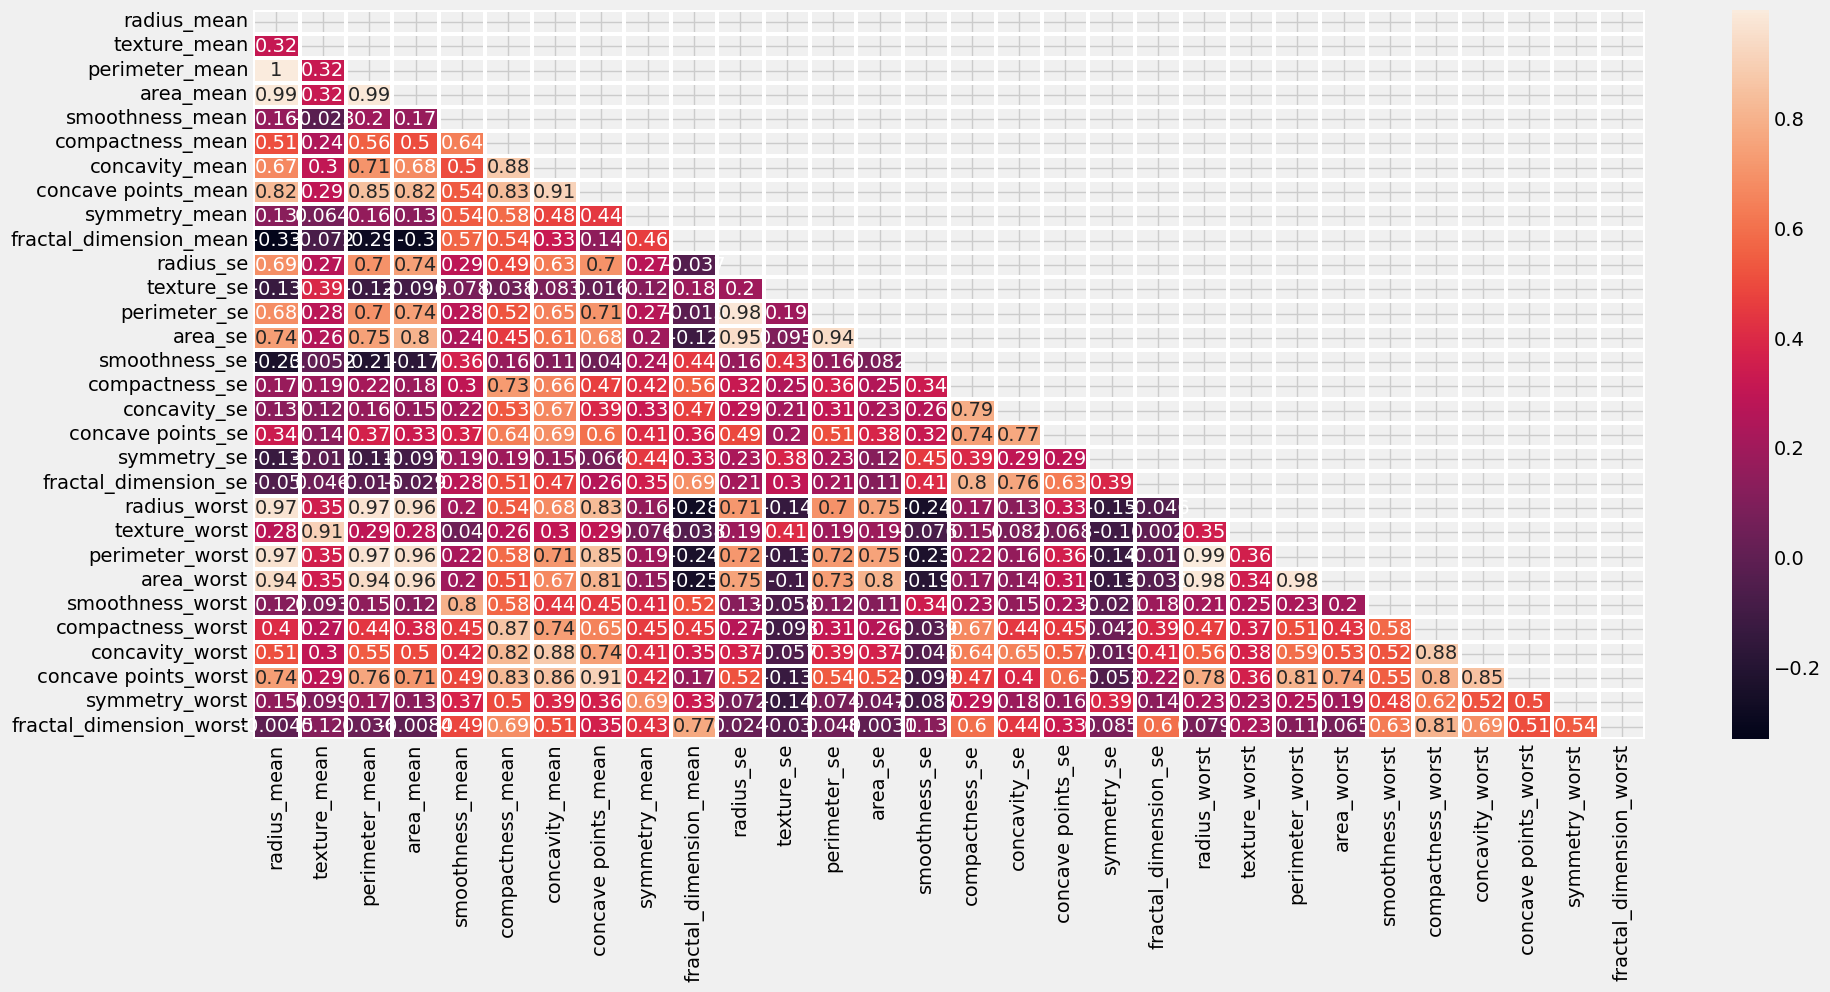

In [162]:
plt.figure(figsize = (20, 9))
matrix = np.triu(corr)        # take lower correlation matrix
sns.heatmap(corr, mask = matrix, annot = True, linewidth = 1.5)

#### <font color = blue> Remove Features (higest corr)

In [163]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [164]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

20

In [165]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_se',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [166]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [167]:
X_train.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,symmetry_worst
338,10.05,17.53,0.10070,0.07326,0.1890,0.06331,2.0150,0.007803,0.02100,0.2894
427,10.80,21.98,0.08801,0.05743,0.2016,0.05977,1.6210,0.006543,0.01844,0.2965
406,16.14,14.86,0.09495,0.08501,0.1735,0.05875,0.6372,0.003958,0.01500,0.2778
96,12.18,17.84,0.10450,0.07057,0.1900,0.06635,1.5110,0.005433,0.02220,0.2227
490,12.25,22.44,0.08192,0.05200,0.1544,0.05976,1.1390,0.005096,0.01608,0.3100


In [168]:
X_train.shape   # 30 -20 = 10

(455, 10)

#### <font color = blue> Label Encoder

In [169]:
LE = LabelEncoder()
Y_train = LE.fit_transform(Y_train)
Y_test = LE.fit_transform(Y_test)        
Y_test                             # malignant = 0,  benign = 1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

#### <font color = blue> Feature Scaling

In [170]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

pd.DataFrame(X_test).head()    # Same Scale

,0,1,2,3,4,5,6,7,8,9
0,-0.201756,0.329079,1.029198,0.864118,1.120328,1.553585,-0.515882,-0.559540,-0.424461,1.082033
1,-0.255558,1.467633,-0.616891,-1.016540,-0.695677,-1.002451,0.258826,-0.434915,-0.861714,-0.731316
2,-0.026193,-0.840768,-1.215402,-0.941988,-0.805295,-0.999514,-1.025150,-0.762670,-1.076677,-1.220809
3,0.041767,-0.236588,-2.223804,-1.013566,-0.637214,-0.999514,-0.999105,-1.349883,-1.159730,-0.426177
4,-0.306528,-0.176411,-0.477601,-1.301861,-1.251074,-0.592839,2.091230,-0.933413,0.755388,-1.457609


## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build Naive Bayes Classifier </font>

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Implementation from Scratch </font>

#### <font color = blue> Build Model

In [171]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

#### <font color = blue> Initialize Model

In [172]:
NB_scratch = NaiveBayes()

#### <font color = blue> Fit the Training Data into Model

In [173]:
NB_scratch.fit(X_train, Y_train)

#### <font color = blue> Predict the Test data

In [174]:
Y_pred_scratch = NB_scratch.predict(X_test)
Y_pred_scratch

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0])

#### <font color = blue> Accuracy Score

In [175]:
Accuracy_Scratch = accuracy_score(Y_pred_scratch, Y_test)
print('Accuracy Score:', Accuracy_Scratch)

Accuracy Score: 0.8771929824561403


### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Implementation with Scikit-Learn </font>

#### <font color = blue> Import Model From Sklearn

In [176]:
from sklearn.naive_bayes import GaussianNB

#### <font color = blue> Initialize Model

In [177]:
NB_Sklearn = GaussianNB()

#### <font color = blue> Fit the Training Data into Model

In [178]:
NB_Sklearn.fit(X_train, Y_train)

GaussianNB()

#### <font color = blue> Predict the Test data

In [179]:
Y_pred_Sklearn = NB_Sklearn.predict(X_test)
Y_pred_Sklearn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0])

#### <font color = blue> Accuracy Score

In [180]:
Accuracy_Sklearn_GB = accuracy_score(Y_pred_Sklearn, Y_test)
print('Accuracy Score:', Accuracy_Sklearn_GB)

Accuracy Score: 0.8771929824561403


BernoulliNb Model From Sklearn

In [181]:
from sklearn.naive_bayes import BernoulliNB

NB_Sklearn = BernoulliNB()
NB_Sklearn.fit(X_train, Y_train)


BernoulliNB()

In [182]:
Y_pred_Sklearn = NB_Sklearn.predict(X_test)
Y_pred_Sklearn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1])

In [183]:
Accuracy_Sklearn_BNB = accuracy_score(Y_pred_Sklearn, Y_test)
print('Accuracy Score:', Accuracy_Sklearn_BNB)

Accuracy Score: 0.868421052631579


MultinomialNB Model From Sklearn

In [184]:
from sklearn.naive_bayes import MultinomialNB 
# because MultinomialNB is used for discrete values like
# word counts in text classification, this is not a suitable classifier for the breast cancer dataset since it 
# contains negative values.
from sklearn.preprocessing import KBinsDiscretizer

NB_Sklearn = MultinomialNB()

n_bins = 10
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
X_binned = kbins.fit_transform(X_train)
NB_Sklearn.fit(X_binned, Y_train)

C:\Users\horac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


MultinomialNB()

In [185]:
Y_pred_Sklearn = NB_Sklearn.predict(X_binned)
Y_pred_Sklearn

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [186]:
Accuracy_Sklearn_MNB = accuracy_score(Y_pred_Sklearn, Y_train)
print('Accuracy Score:', Accuracy_Sklearn_MNB)

Accuracy Score: 0.7978021978021979


CategoricalNB Model From Sklearn

In [187]:
from sklearn.naive_bayes import CategoricalNB
# CategoricalNB has the same issue MultinomialNB since the dataset contains negative values
# since it is used for categorical values, it is not suitable for the breast cancer dataset
from sklearn.preprocessing import KBinsDiscretizer

NB_Sklearn = CategoricalNB()

n_bins = 10
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
X_binned = kbins.fit_transform(X_train)
NB_Sklearn.fit(X_binned, Y_train)

C:\Users\horac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


CategoricalNB()

In [188]:
Y_pred_Sklearn = NB_Sklearn.predict(X_binned)
Y_pred_Sklearn

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [189]:
Accuracy_Sklearn_CNB = accuracy_score(Y_pred_Sklearn, Y_train)
print('Accuracy Score', Accuracy_Sklearn_CNB) 

Accuracy Score 0.9296703296703297


ComplementNB Model From SKlearn

In [190]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import KBinsDiscretizer

NB_Sklearn = ComplementNB()

n_bins = 10
kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
X_binned = kbins.fit_transform(X_train)
NB_Sklearn.fit(X_binned, Y_train)

C:\Users\horac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


ComplementNB()

In [191]:
Y_pred_Sklearn = NB_Sklearn.predict(X_binned)
Y_pred_Sklearn

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [192]:
Accuracy_Sklearn_ComplementNB = accuracy_score(Y_pred_Sklearn, Y_train)
print('Accuracy Score', Accuracy_Sklearn_ComplementNB) 

Accuracy Score 0.7472527472527473


### <font color = #27C3E5> 3.3: </font> <font color = #41EA46> Comparison (Scratch vs. Scikit-Learn) </font>

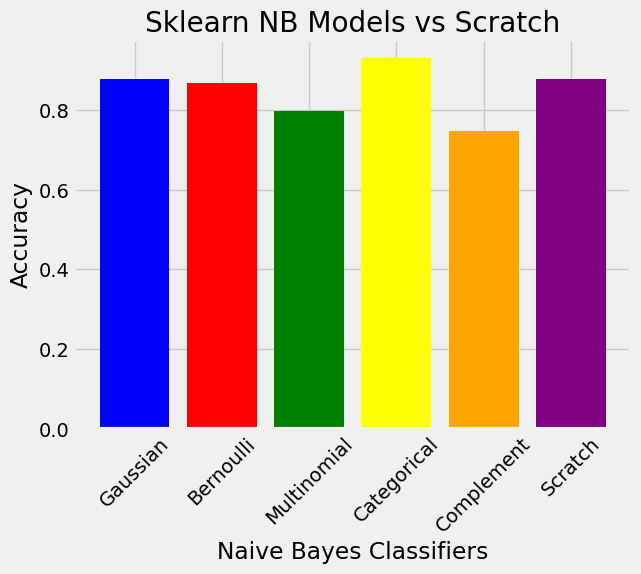

In [199]:
accuracy = [Accuracy_Sklearn_GB, Accuracy_Sklearn_BNB, Accuracy_Sklearn_MNB, Accuracy_Sklearn_CNB, Accuracy_Sklearn_ComplementNB, Accuracy_Scratch]
label = ["Gaussian", "Bernoulli", "Multinomial", "Categorical", "Complement", "Scratch"]
label_positions = range(len(label))
plt.bar(label, accuracy, color = ['blue', 'red', 'green', 'yellow', 'orange', 'purple'])
plt.title("Sklearn NB Models vs Scratch")
plt.xlabel("Naive Bayes Classifiers")
plt.ylabel("Accuracy")
plt.xticks(label_positions, label, rotation = 45)
plt.show()

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<Axes: >

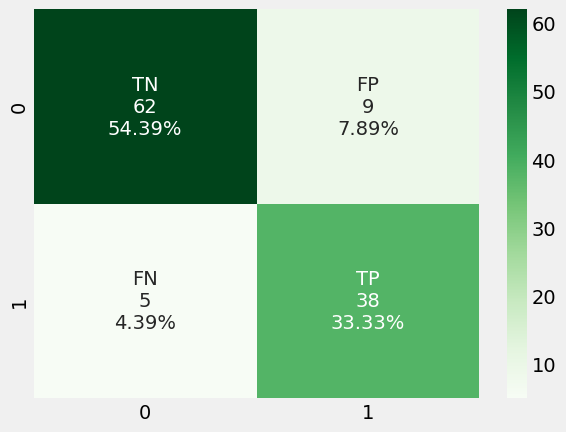

In [200]:
confusion_matrix_Scratch = confusion_matrix(Y_pred_scratch, Y_test)

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens')

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

#### <font color = blue>4.2.1: Calculate the Results

In [ ]:
# Accuracy Score
Accuracy = accuracy_score(Y_pred_scratch, Y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(Y_pred_scratch, Y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(Y_pred_scratch, Y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(Y_pred_scratch, Y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(Y_pred_scratch, Y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(Y_pred_scratch, Y_test)
print('ROC Area:', Roc) 

Accuracy Score: 0.8771929824561403
Precision Score: 0.8085106382978723
True positive Rate: 0.8837209302325582
False positive Rate 0.1267605633802817
F1 Score: 0.8444444444444444
Specificity: 0.8732394366197183
Mean Absolute Error: 0.12280701754385964
ROC Area: 0.8784801834261382


#### <font color = blue>4.2.2: Visualize the Results

<BarContainer object of 8 artists>

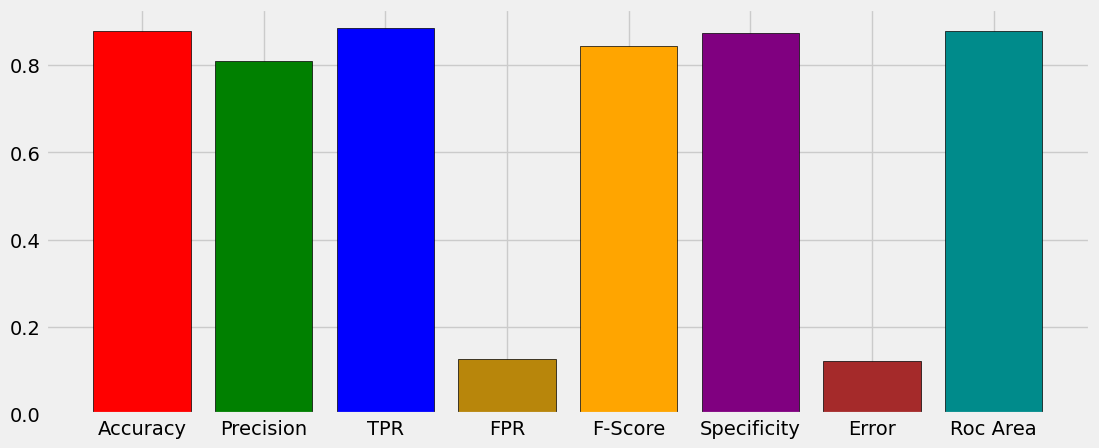

In [ ]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')